<a href="https://colab.research.google.com/github/Ezzeldin-nasser939/Covid_19_classification/blob/main/Covid_19_classification(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
import pandas as pd
import keras
from keras.models import *
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from skimage.util.dtype import convert
from pathlib import Path
from PIL import Image

In [ ]:
!pip install opendatasets
!pip install pandas

import opendatasets as od


od.download("https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ezzeldinnasser22
Your Kaggle Key: ··········


100%|██████████| 158M/158M [00:01<00:00, 149MB/s]


In [ ]:
tarin_covid=[]
labels_covid=[]
files =Path('/content/covid19-image-dataset/Covid19-dataset/train/Covid').glob('*')
for myFile in files:
  img=Image.open(myFile)
  img = img.convert('L')
  img=img.resize((256,256))
  img=np.array(img)
  tarin_covid.append(img)
  labels_covid.append(1)

In [ ]:
tarin_covid=np.array(tarin_covid)
labels_covid=np.array(labels_covid)
print(tarin_covid.shape)
print(labels_covid.shape)

(111, 256, 256)
(111,)


In [ ]:
tarin_normal=[]
labels_normal=[]
files =Path('/content/covid19-image-dataset/Covid19-dataset/train/Normal').glob('*')
for myFile in files:
  img=Image.open(myFile)
  img = img.convert('L')
  img=img.resize((256,256))
  img=np.array(img)
  tarin_normal.append(img)
  labels_normal.append(0)

In [ ]:
tarin_normal=np.array(tarin_normal)
labels_normal=np.array(labels_normal)
print(tarin_normal.shape)
print(labels_normal.shape)

(70, 256, 256)
(70,)


In [ ]:
test_covid=[]
test_labels_covid=[]
files =Path('/content/covid19-image-dataset/Covid19-dataset/test/Covid').glob('*')
for myFile in files:
  img=Image.open(myFile)
  img = img.convert('L')
  img=img.resize((256,256))
  img=np.array(img)
  test_covid.append(img)
  test_labels_covid.append(1)

In [ ]:
test_covid=np.array(test_covid)
test_labels_covid=np.array(test_labels_covid)
print(test_covid.shape)
print(test_labels_covid.shape)

(26, 256, 256)
(26,)


In [ ]:
test_normal=[]
test_labels_normal=[]
files =Path('/content/covid19-image-dataset/Covid19-dataset/test/Normal').glob('*')
for myFile in files:
  img=Image.open(myFile)
  img = img.convert('L')
  img=img.resize((256,256))
  img=np.array(img)
  test_normal.append(img)
  test_labels_normal.append(0)

In [ ]:
test_normal=np.array(test_normal)
test_labels_normal=np.array(test_labels_normal)
print(test_normal.shape)
print(test_labels_normal.shape)

(20, 256, 256)
(20,)


In [ ]:
x_train=np.concatenate((tarin_normal,tarin_covid))
y_train=np.concatenate((labels_normal,labels_covid))
print(x_train.shape)
print(y_train.shape)

(181, 256, 256)
(181,)


In [ ]:
x_test=np.concatenate((test_normal,test_covid))
y_test=np.concatenate((test_labels_normal,test_labels_covid))
print(x_test.shape)
print(y_test.shape)

(46, 256, 256)
(46,)


In [ ]:
x_test[0]

array([[ 58,  54,  55, ..., 120, 118, 114],
       [ 61,  59,  61, ..., 122, 121, 122],
       [ 67,  63,  65, ..., 122, 122, 126],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
x_train_final=x_train/255
x_test_final=x_test/255

In [ ]:
print(x_train_final[1])

[[0.03137255 0.03529412 0.03529412 ... 0.02352941 0.02352941 0.02352941]
 [0.02745098 0.03529412 0.03529412 ... 0.01960784 0.01960784 0.01960784]
 [0.02745098 0.03137255 0.03137255 ... 0.01176471 0.01568627 0.01176471]
 ...
 [0.02352941 0.02745098 0.02352941 ... 0.03529412 0.03529412 0.03137255]
 [0.02745098 0.02745098 0.02352941 ... 0.03529412 0.03529412 0.03529412]
 [0.02745098 0.02745098 0.02352941 ... 0.03529412 0.03529412 0.03529412]]


In [ ]:
x_train_final=x_train_final.reshape(-1,65536)
x_test_final=x_test_final.reshape(-1,65536)
print(x_train_final.shape)
print(x_test_final.shape)

(181, 65536)
(46, 65536)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(1,input_shape=(65536,), activation="sigmoid"))
model.compile(optimizer='sgd',loss= 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
#results = model.fit(x=x_train, y=y_train,shuffle=True,epochs=10)
results=model.fit(
  x=x_train_final,
  y=y_train,
  shuffle=True,
  epochs=20,
  validation_data=(x_test_final,y_test)
)

Epoch 1/20
6/6 [==============================] - 1s 102ms/step - loss: 16.5613 - accuracy: 0.4586 - val_loss: 5.5325 - val_accuracy: 0.5652
Epoch 2/20
6/6 [==============================] - 0s 25ms/step - loss: 14.7278 - accuracy: 0.5470 - val_loss: 9.0840 - val_accuracy: 0.5217
Epoch 3/20
6/6 [==============================] - 0s 24ms/step - loss: 9.0542 - accuracy: 0.5525 - val_loss: 2.1323 - val_accuracy: 0.8696
Epoch 4/20
6/6 [==============================] - 0s 19ms/step - loss: 0.5993 - accuracy: 0.9392 - val_loss: 0.9694 - val_accuracy: 0.9130
Epoch 5/20
6/6 [==============================] - 0s 15ms/step - loss: 0.3962 - accuracy: 0.9558 - val_loss: 2.1908 - val_accuracy: 0.8696
Epoch 6/20
6/6 [==============================] - 0s 38ms/step - loss: 0.6513 - accuracy: 0.9282 - val_loss: 0.7196 - val_accuracy: 0.9348
Epoch 7/20
6/6 [==============================] - 0s 24ms/step - loss: 0.5274 - accuracy: 0.9337 - val_loss: 1.2252 - val_accuracy: 0.9130
Epoch 8/20
6/6 [========

Text(0, 0.5, 'losses')

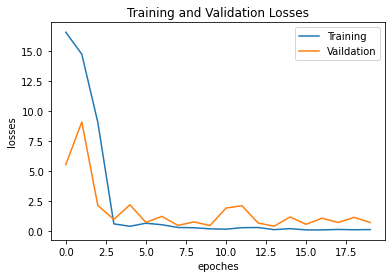

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

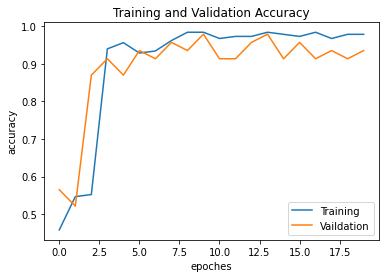

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')